In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [ ]:
# don't forget to import random forest model

In [34]:
ls


Untitled.ipynb
clean_quality_inr.csv
new_rf_order_quality_df.csv
order_train.csv
prelimEDA.ipynb
product_df.csv
python_to_R_translate.R
quality_df.csv
randomforest_featureimportance_qualityorder.ipynb
rf_order_quality_df.csv
user_df.csv


In [35]:
# We train a random forest to determine feature importance based on quality data set
# First we load in the data set cleaned from R
rf_df = pd.read_csv("new_rf_order_quality_df.csv")
print('size of rf_df:', rf_df.shape)

size of rf_df: (277759, 36)


In [36]:
rf_df.head()

,application_type,op_type,col_type,user_loan_experience,user_has_car,user_social_security,qid77,user_work_period,loan_limit_n,op_type_n,...,mobile_quality,standard_type,guarantee_type,user_income_by_card_bucket,application_term_buckets,app_limit_buckets,date_buckets,term_buckets,limit_buckets,result
0,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,1,-999,-999,-999,10,6,11,48,10,0
1,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,1,-999,-999,-999,10,6,11,12,10,0
2,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,1,-999,-999,-999,10,6,11,12,4,0
3,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,1,-999,-999,-999,10,6,11,24,10,0
4,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,1,-999,-999,-999,10,6,11,12,101,0


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
randomForest = RandomForestClassifier()

In [16]:
rf_df.iloc[:, 0:35]

,application_type,op_type,col_type,user_loan_experience,user_has_car,user_social_security,qid77,user_work_period,loan_limit_n,op_type_n,...,mobile_is_paid,mobile_quality,standard_type,guarantee_type,user_income_by_card_bucket,application_term_buckets,app_limit_buckets,date_buckets,term_buckets,limit_buckets
0,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,0,1,-999,-999,unknown,< 10,< 6,time 11,term 48,<10
1,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,0,1,-999,-999,unknown,< 10,< 6,time 11,term 12,<10
2,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,0,1,-999,-999,unknown,< 10,< 6,time 11,term 12,< 4
3,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,0,1,-999,-999,unknown,< 10,< 6,time 11,term 24,<10
4,0,-999,-999,-999,-999,-999,-999,-999,0,0,...,0,1,-999,-999,unknown,< 10,< 6,time 11,term 12,<101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277754,0,-999,-999,-999,-999,-999,-999,-999,5,2,...,0,1,-999,-999,unknown,< 10,< 6,time 14,term 12,<20
277755,0,-999,-999,-999,-999,-999,-999,-999,2,1,...,0,1,-999,-999,unknown,< 10,< 6,time 14,term 12,<10
277756,0,-999,-999,-999,-999,-999,-999,-999,2,1,...,0,1,-999,-999,unknown,< 10,< 6,time 15,term 12,<10
277757,9,4,0,1,5,0,3,12,4,1,...,0,0,1,2,under 1000,< 20,< 6,time 14,less than 100,< 4


In [37]:
rf_data = rf_df.iloc[:, 0:35]
rf_target = rf_df.iloc[:, 35]

In [19]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(rf_data, rf_target, test_size=0.2, random_state=0)

In [41]:
randomForest.set_params(random_state=0)

%time randomForest.fit(X_train, y_train) 
    
print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

CPU times: user 27.8 s, sys: 498 ms, total: 28.3 s
Wall time: 29.5 s
The training error is: 0.03221
The test     error is: 0.14491


In [42]:
feature_importance = list(zip(rf_data.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'date_bucke', b'limit_buck', b'term_bucke', b'col_type', b'user_work_']

(b'date_bucke', b'limit_buck', b'term_bucke', b'col_type', b'user_work_', b'app_limit_', b'user_loan_', b'loan_limit', b'applicatio', b'user_has_c', b'user_age_n', b'applicatio', b'quality', b'user_incom', b'cash_recei', b'mobile_ver', b'user_incom', b'mobile_qua', b'user_loan_', b'platform', b'op_type', b'col_type_n', b'user_socia', b'qid77', b'user_work_', b'user_has_c', b'user_socia', b'spam_score', b'mobile_is_', b'qid77_n', b'op_type_n', b'product_ty', b'is_paid', b'standard_t', b'guarantee_')
(0.06649242041289863, 0.05702951325936826, 0.055076093905941315, 0.049846145115617725, 0.048588871238574194, 0.04793951084529507, 0.046627357483549764, 0.040158618159789744, 0.03953425504511079, 0.0387318344026612, 0.03844534158160412, 0.03760128970707032, 0.03584783896268404, 0.030738001986245957, 0.03028637539404282, 0.028499288407020967, 0.027944821758944843, 0.021315606139099063, 0.021106507413779688, 0.020306807656738632, 0.01934826709441654, 0.019272274103162425, 0.017861698383343467, 

<BarContainer object of 35 artists>

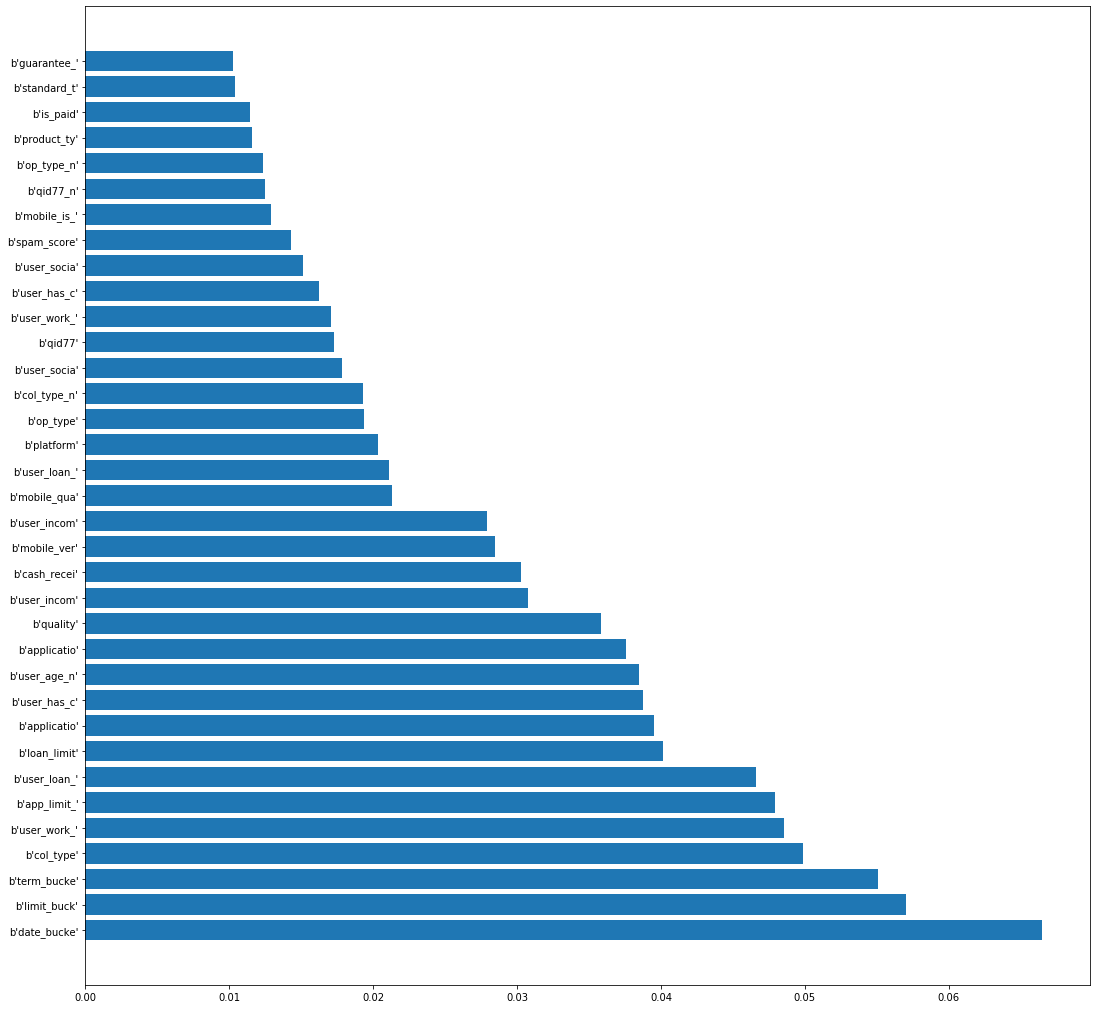

In [49]:
featureNames, featureScores = zip(*list(feature_sort))
print(featureNames)
print(featureScores)
plt.figure(figsize=(18,18))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
# plt.figure(figsize = (20,20))

In [24]:
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [39]:
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
features = pd.concat(result, axis=1)
features.columns = final.columns[1:]
target   = final.rating


In [ ]:
rf    = RandomForestClassifier(class_weight='balanced')
params = {'n_estimators':range(20,81,10), 'max_depth':range(2,12), 'max_features':range(1,5), \
          'min_samples_leaf':range(1,5), 'min_samples_split':range(2,5)}
gs_rf = GridSearchCV(rf, params, cv=3, iid=True, return_train_score=True)